In [1]:
using Plots

# Problem 1
Plot a path of possible stock prices

In [2]:
S = 100.0
T = 1.0
n = 10_000
σ = 0.3
r = 0.08

0.08

In [3]:
h = T / n
u = exp(r * h + σ * sqrt(h))
d = exp(r * h - σ * sqrt(h))
p = (exp(r * h) - d) / (u - d)

0.49925000056252455

In [4]:
# Plot a single stock price path
curr = S
prices = ones(n) * curr

for i in 2:n
    curr *= rand() < p ? u : d
    prices[i] = curr
end

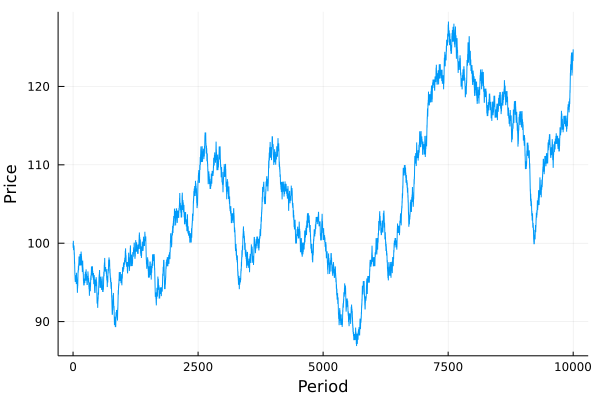

In [5]:
plot(prices, legend=false)
xlabel!("Period")
ylabel!("Price")

In [6]:
# Create a function which creates a stock
# price path given inital parameters
function createPath(S::Float64, r::Float64, 
                    sigma::Float64, 
                    T::Float64, n::Int64)
    h = T / n
    u = exp(r * h + sigma * sqrt(h))
    d = exp(r * h - sigma * sqrt(h))
    p = (exp(r * h) - d) / (u - d)
    
    curr = S
    prices = ones(n) * curr

    for i in 2:n
        curr *= rand() < p ? u : d
        prices[i] = curr
    end
    
    plot!(prices, legend=false)
end

createPath (generic function with 1 method)

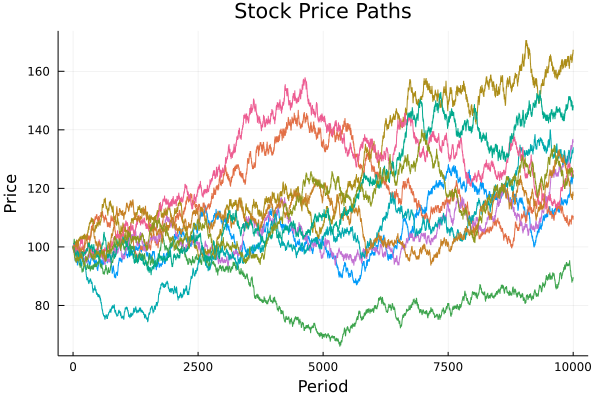

In [7]:
# Use createPath to create 10 different stock
# paths and plot them all onthe same plot
Threads.@threads for _ in 2:10
    createPath(S, r, σ, T, n)
end

title!("Stock Price Paths")

# Problem 2
Figure out what distribution the stock prices follow when using the binomial model

## Note
when $n = 2$, we have $[p^2, 2p(1-p), (1-p)^2]$
  
when $n = 3$, we have $[p^3, 3p^2(1-p), 3p(1-p)^2, (1-p)^3]$

and in general, the kth term (starting at 0) is ${n \choose k} p^{n-k}(1-p)^k$

In [8]:
function get_probilities(n)
    probs = zeros(n + 1)
    for k in 0:n
        c = binomial(BigInt(n),BigInt(k))
        probs[k+1] = c * (p ^ (n - k)) * ((1 - p) ^ k)
    end
    probs
end

get_probilities (generic function with 1 method)

In [9]:
# draw a 3 period binomial tree
get_probilities(3)

4-element Array{Float64,1}:
 0.12443834374875369
 0.3744366579387813
 0.37556165456375007
 0.12556334374871495

In [10]:
# this should sum up to one
sum(get_probilities(3))

1.0

# Note
when n = 2, we have $[u^2S, udS, d^2S]$

when n = 3, we have $[u^3S, u^2dS, ud^2S, d^3S]$

and in general, the kth term (starting at 0) is $u^{n-k} * d^k * S$

In [11]:
function get_prices(u, d, n)
    [u ^ (n - k) * d ^ k * S for k in 0:n]
end

get_prices (generic function with 1 method)

In [12]:
get_prices(u, d, 3)

4-element Array{Float64,1}:
 100.90648390393962
 100.30285769003527
  99.70284238984046
  99.1064164027396

In [13]:
function make_distribution(n)
    h = T / n
    u = exp(r * h + σ * sqrt(h))
    d = exp(r * h - σ * sqrt(h))
    p = (exp(r * h) - d) / (u - d)
    
    prices = get_prices(u, d, n)
    probs = get_probilities(n)
    scatter(prices, probs, legend=false)
    xlabel!("Price")
    ylabel!("Probability")
    title!("Distrbution for Binomial Model with $n periods")
end

make_distribution (generic function with 1 method)

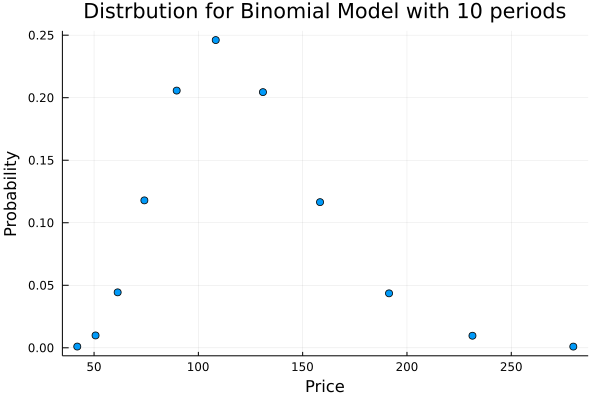

In [14]:
make_distribution(10)

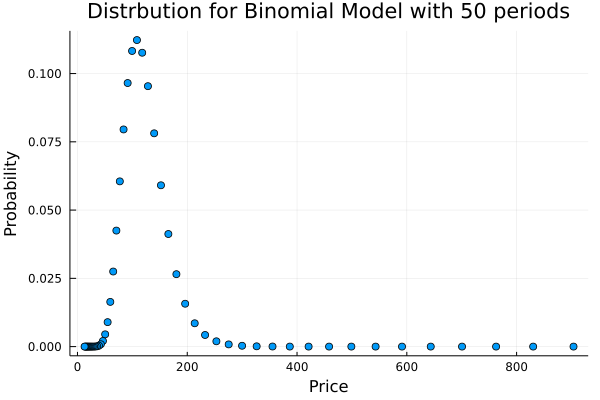

In [15]:
make_distribution(50)

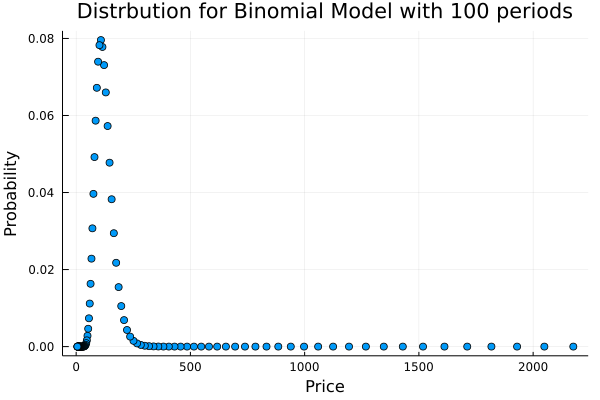

In [16]:
make_distribution(100)